In [1]:
#% matplotlib inline

from datetime import datetime 
import h5py
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd
import seaborn as sns
import time
import matplotlib.cm as cm
from matplotlib import colors
from matplotlib.colors import LinearSegmentedColormap
cmap = cm.get_cmap('Blues')
import random
from scipy import signal, cluster, stats
from multiprocessing import Pool
import scipy as sp
from scipy import linalg
import cairosvg
from PIL import Image

import matplotlib as mpl
mpl.rcParams["image.interpolation"] = 'none'

In [2]:
# For plotting, from Luke

def compute_bounds(mu, sig, n_sigma = 3):
    """
    Use mean and standard deviation vectors to compute upper and lower bounds.
    """
    upper = mu + n_sigma * np.sqrt(np.abs(sig))
    lower = mu - n_sigma * np.sqrt(np.abs(sig))
    
    return upper, lower

In [3]:
# Get original data to create features by cluster

#pull these from hdf5
s_df3 = pd.read_hdf('Data/Fig4.hdf5', 's_df3')
s_df6 = pd.read_hdf('Data/Fig4.hdf5', 's_df6')
s_df7 = pd.read_hdf('Data/Fig4.hdf5', 's_df7')
s_df13 = pd.read_hdf('Data/Fig4.hdf5', 's_df13')


s_df_xz = pd.concat([s_df3, s_df6, s_df7, s_df13])

In [4]:
#flattening
splines = np.asarray(s_df_xz['shifted_filters'])
spline_array = np.zeros((splines.shape[0], (splines[0].shape[0])*splines[0].shape[1]))
spline_array_cropped = np.zeros((splines.shape[0], 212*7))

for i, spline in enumerate(splines):
    current_spline = spline
    current_spline_flat = current_spline.flatten(order='F')
    spline_array[i,:] = current_spline_flat
    
    current_spline_cropped = spline[50:-50,12:19]
    current_spline_cropped_flat = current_spline_cropped.flatten()#order='F'
    spline_array_cropped[i,:] = current_spline_cropped_flat

#flattening the other way too
splines = np.asarray(s_df_xz['shifted_filters'])

spline_array_orderC = np.zeros((splines.shape[0], (splines[0].shape[0])*splines[0].shape[1]))

for i, spline in enumerate(splines):
    current_spline = spline
    current_spline_flat = current_spline.flatten()#order='F')
    spline_array_orderC[i,:] = current_spline_flat

zscored_spline_array = ((spline_array_cropped.T-np.mean(spline_array_cropped, axis=1))/np.std(spline_array_cropped, axis=1)).T

threshold = 2.5
quality_mask = np.where(np.amax(np.abs(zscored_spline_array), axis=1)>threshold)

s_df_xz_masked = s_df_xz.iloc[quality_mask].copy()

In [5]:
#pull from hdf5 file
#read hdf5 file for this notebook
f1 = h5py.File("Data/Fig4.hdf5", "r")

#get the data for plotting the sd image
cluster_assignments = np.array(f1['cluster_assignments_original'])
f1.close()

s_df_xz_masked['new_cluster_assignment'] = cluster_assignments

C:\Users\alv5645\AppData\Local\Temp/ipykernel_16496/1390495080.py:6: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  cluster_assignments = np.array(f1['cluster_assignments_original'])


# Get the new data and sparsify

In [6]:
#pull these from hdf5
s_df33 = pd.read_hdf('Data/Fig4.hdf5', 's_df33')
s_df22 = pd.read_hdf('Data/Fig4.hdf5', 's_df22')
s_df5 = pd.read_hdf('Data/Fig4.hdf5', 's_df5')
s_df66 = pd.read_hdf('Data/Fig4.hdf5', 's_df66')
s_df77 = pd.read_hdf('Data/Fig4.hdf5', 's_df77')


In [7]:
s_df_xz_new = pd.concat([s_df33, s_df22, s_df5, s_df66, s_df77]) #s_df2, throwing out lowest quality field from Sept 21

In [8]:
#flattening
splines = np.asarray(s_df_xz_new['shifted_filters'])
spline_array = np.zeros((splines.shape[0], (splines[0].shape[0])*splines[0].shape[1]))
spline_array_cropped = np.zeros((splines.shape[0], 212*7))

for i, spline in enumerate(splines):
    current_spline = spline
    current_spline_flat = current_spline.flatten(order='F')
    spline_array[i,:] = current_spline_flat
    
    current_spline_cropped = spline[30:-70,12:19]
    current_spline_cropped_flat = current_spline_cropped.flatten()#order='F'
    spline_array_cropped[i,:] = current_spline_cropped_flat

# spline_array_cropped = spline_array[:, 2550:4200]##spline_array[:, 300:-300]

In [9]:
#flattening the other way too
splines = np.asarray(s_df_xz_new['shifted_filters'])

spline_array_orderC = np.zeros((splines.shape[0], (splines[0].shape[0])*splines[0].shape[1]))

for i, spline in enumerate(splines):
    current_spline = spline
    current_spline_flat = current_spline.flatten()#order='F')
    spline_array_orderC[i,:] = current_spline_flat

# spline_array_cropped = spline_array[:, 2550:4200]##spline_array[:, 300:-300]

In [10]:
zscored_spline_array = ((spline_array_cropped.T-np.mean(spline_array_cropped, axis=1))/np.std(spline_array_cropped, axis=1)).T

threshold = 2.5
quality_mask = np.where(np.amax(np.abs(zscored_spline_array), axis=1)>threshold)

s_df_xz_new_masked = s_df_xz_new.iloc[quality_mask].copy()

# Clustering

In [11]:
#pull from hdf5 file
#read hdf5 file for this notebook
f1 = h5py.File("Data/Fig4.hdf5", "r")

#get the data for plotting the sd image
cluster_assignments = np.array(f1['cluster_assignments'])
f1.close()

s_df_xz_new_masked['new_cluster_assignment'] = cluster_assignments

C:\Users\alv5645\AppData\Local\Temp/ipykernel_16496/2105156032.py:6: DeprecationWarning: `product` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `prod` instead.
  cluster_assignments = np.array(f1['cluster_assignments'])


# Clustering results

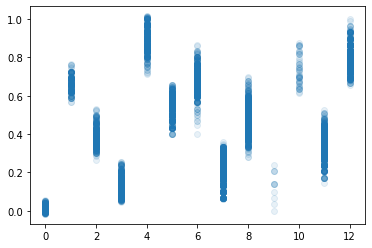

In [12]:
plt.scatter(cluster_assignments, s_df_xz_new_masked['depth'], alpha=0.1)

In [13]:
s_df_xz_copy = s_df_xz_new_masked.copy(deep=True)
s_df_xz_copy = s_df_xz_copy.set_index(['new_cluster_assignment'])

cluster_avg_depth = s_df_xz_copy['depth'].groupby(['new_cluster_assignment']).mean()

cluster_avg_depth

new_cluster_assignment
0     0.018244
1     0.663285
2     0.386937
3     0.120709
4     0.891181
5     0.540211
6     0.683594
7     0.213664
8     0.475085
9     0.134674
10    0.736401
11    0.339986
12    0.799253
Name: depth, dtype: float64

In [14]:
#from original clustering
ipl_depth_order = np.array([0, 3, 9, 7, 11, 2, 8, 5, 6, 1, 10, 12, 4])

In [15]:
# #plot clusters by IPL depth
# n_bins = 10
# current_palette = sns.color_palette()

# cmap_name = 'my_list'
# cm = LinearSegmentedColormap.from_list(cmap_name, current_palette, N=n_bins)

# c = s_df_xz_new_masked['field']

# fig=plt.figure(figsize=(20,10))


# ax = sns.swarmplot(data=s_df_xz_new_masked, x="new_cluster_assignment", y="depth", hue="field",
#                    alpha=0.6, cmap='cm', size=1.0, order=ipl_depth_order) #color='k', 
# # plt.scatter(s_df_xz['new_cluster_assignment'], s_df_xz['depth'], alpha=0.3, c=c, cmap=cm)
# # plt.colorbar()
# plt.scatter(cluster_avg_depth.index, cluster_avg_depth[ipl_depth_order], color='k')

# axes = plt.gca()
# # axes.axhline(on_top, linestyle='dotted', color='k')
# # axes.axhline(on_bottom, linestyle='dotted', color='k')
# # axes.axhline(on_mean, linestyle='dotted', color='k')
# # axes.axhline(off_top, linestyle='dotted', color='k')
# # axes.axhline(off_bottom, linestyle='dotted', color='k')
# # axes.axhline(off_mean, linestyle='dotted', color='k')
# axes.set_xlabel('cluster #')
# axes.set_ylabel('IPL depth')
# plt.grid(True)

# # Figpath = 'Fig_temp/'
# # savename = Figpath+"Clusters_ipl_depth_chat.pdf"
# # plt.savefig(savename, transparent=True, bbox_inches='tight')

# plt.show()

In [16]:
#make combined df for doing the averages
s_df_xz_new_masked['shifted_filters_corrected'] = s_df_xz_new_masked['shifted_filters'].apply(lambda x: x[:-40,:])
# s_df_xz_new_masked['shifted_filters_corrected_drug'] = s_df_xz_new_masked['shifted_filters_drug'].apply(lambda x: x[:-40,:])

s_df_xz_masked['shifted_filters_corrected'] = s_df_xz_masked['shifted_filters'].apply(lambda x: x[40:,:])

allroi_df = pd.concat([s_df_xz_new_masked, s_df_xz_masked])

In [17]:
#make average filters
clusters = np.unique(np.array(allroi_df['new_cluster_assignment']))

average_filters = np.zeros((allroi_df['shifted_filters_corrected'].iloc[0].shape[0], allroi_df['shifted_filters_corrected'].iloc[0].shape[1], clusters.shape[0]))
average_filters_drug = np.zeros((s_df_xz_new_masked['shifted_filters_corrected'].iloc[0].shape[0], s_df_xz_new_masked['shifted_filters_corrected'].iloc[0].shape[1], clusters.shape[0]))

for i, clust in enumerate(clusters):
    current_frame = allroi_df[allroi_df['new_cluster_assignment']==clust]    
    current_mean = np.nanmean(np.dstack(current_frame['shifted_filters_corrected']), axis=2)
    average_filters[:,:,i] = current_mean

#make SD of filters
clusters = np.unique(np.array(allroi_df['new_cluster_assignment']))

sd_filters = np.zeros((allroi_df['shifted_filters_corrected'].iloc[0].shape[0], allroi_df['shifted_filters_corrected'].iloc[0].shape[1], clusters.shape[0]))


for i, clust in enumerate(clusters):
    current_frame = allroi_df[allroi_df['new_cluster_assignment']==clust]    
    current_sd = np.nanstd(np.dstack(current_frame['shifted_filters_corrected']), axis=2)
    sd_filters[:,:,i] = current_sd


C:\Users\alv5645\AppData\Local\Temp/ipykernel_16496/1522940462.py:9: RuntimeWarning: Mean of empty slice
  current_mean = np.nanmean(np.dstack(current_frame['shifted_filters_corrected']), axis=2)
C:\Users\alv5645\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


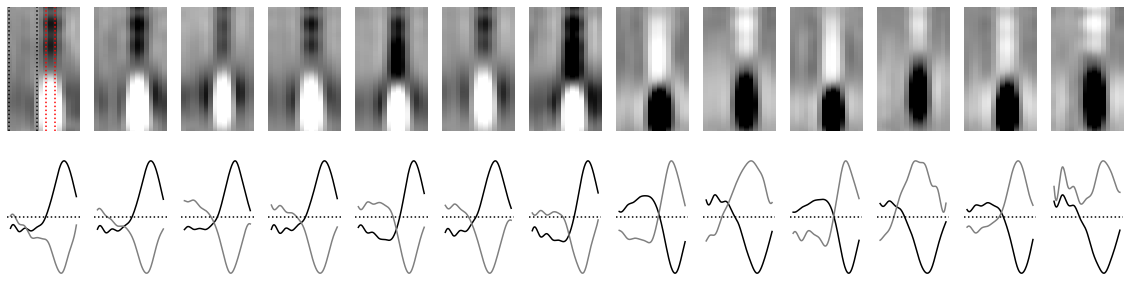

In [18]:
#plot the cluster averages and normalized temporal kernels and calculate latency and surround strength

polarity = [1, -1, 1, 1, -1, -1, -1, 1, 1, 1, -1, 1, -1]
latency = np.zeros(len(polarity))
surround_strength = np.zeros(len(polarity))
fig, ax = plt.subplots(2, 13, figsize=(20, 5))
for i, clust in enumerate(ipl_depth_order):
    
    
    ax[0, i].imshow(average_filters[15:-15,10:26,clust]/np.linalg.norm(average_filters[50:-50,11:19,clust]), 
                    aspect='auto', cmap='Greys_r', vmin=-0.05, vmax=0.05)
    if i == 0:
        ax[0, i].axvline(10-10, color='k', linestyle='dotted')
        ax[0, i].axvline(16-10, color='k', linestyle='dotted')
        ax[0, i].axvline(18-10, color='r', linestyle='dotted')
        ax[0, i].axvline(20-10, color='r', linestyle='dotted')
    ax[0, i].axis('off')
    
    avg_filter_flipped = average_filters[:,:,clust]*polarity[clust] #deal with off cells

    ax[1, i].plot(polarity[clust]*np.mean(avg_filter_flipped[15:-15,18:21], axis=1)/np.amax(np.mean(avg_filter_flipped[100:-15,18:21], axis=1)), color='k',)
    ax[1, i].plot(polarity[clust]*np.mean(avg_filter_flipped[15:-15,10:17], axis=1)/np.amin(np.mean(avg_filter_flipped[150:-15,10:17], axis=1))*-1, color='grey')
    ax[1, i].axhline(color='k', linestyle='dotted')
    ax[1, i].set_yticklabels([])
    ax[1, i].set_xticklabels([])
    ax[1, i].axis('off')
    

    center = np.mean(avg_filter_flipped[150:280,18:21], axis=1)/np.amax(np.mean(avg_filter_flipped[150:280,18:21], axis=1))
    surround = np.mean(avg_filter_flipped[150:280,10:17], axis=1)/np.amin(np.mean(avg_filter_flipped[150:280,10:17], axis=1))
    latency[clust] = np.argmax(center)-np.argmax(surround) 
    surround_strength[clust] = np.amin(np.mean(avg_filter_flipped[100:280,10:17], axis=1))/np.amax(np.mean(avg_filter_flipped[100:280,18:21], axis=1))

plt.show()
    

# insert the cluster assignments into the database

# do motion vs. random predictions

In [19]:
def get_svg_parameters_on_screen(dendrite_length, moving_bar_length, stimulus_velocity,
                             starting_point, distance_covered, real_time_lag, time_points, space_per_pixel):
    temporal_conversion = time_points / real_time_lag  # From seconds to pixel.
    spatial_conversion = 1 / space_per_pixel  # From um to pixel.

    # Moving bar is already fully on screen at t = 0
    distance_moved = distance_covered - moving_bar_length  # [um]
    stimulation_time = (distance_moved / stimulus_velocity)  # [s]

    # Convert from seconds & um to pixel
    stimulation_time_pixel = stimulation_time * temporal_conversion

    distance_moved_pixel = distance_moved * spatial_conversion
    dendrite_length_pixel = dendrite_length * spatial_conversion
    moving_bar_length_pixel = moving_bar_length * spatial_conversion
    starting_point_pixel = starting_point * spatial_conversion
    distance_covered_pixel = distance_covered * spatial_conversion

    # Slope of diagonal
    slope = -stimulation_time_pixel / distance_moved_pixel

    # Calculate thickness of diagonal
    alpha = np.arctan(stimulation_time_pixel / distance_moved_pixel)
    diagonal_thickness = 0.5#moving_bar_length_pixel * np.sin(alpha)

    # Calculate coordinates for beginning & end of diagonal
    # Diagonal starts and ends out of picture to allow for a smooth & exact picture.
    x_start = starting_point_pixel-0.5
    x_stop = x_start + distance_covered_pixel-0.5

    y_start = (moving_bar_length_pixel / 2) * slope  # Negative
    y_stop = stimulation_time_pixel - y_start

    return (stimulation_time_pixel, dendrite_length_pixel,
            diagonal_thickness,
            x_start, x_stop, y_start, y_stop)

In [20]:
#pull the convolution parameters for modeling
convolution_params = {}
file = h5py.File('Data/Fig4.hdf5', 'r')
dict_group_load = file['convolution_params']
dict_group_keys = dict_group_load.keys()
for k in dict_group_keys:
    convolution_params[k]= float(dict_group_load[k][0])
    
real_time_lag = convolution_params['real_time_lag']
time_points = convolution_params['time_points']
space_per_pixelx = convolution_params['space_per_pixelx']
space_per_pixely = convolution_params['space_per_pixely']
file.close()

C:\Users\alv5645\AppData\Local\Temp/ipykernel_16496/3261193194.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  convolution_params[k]= float(dict_group_load[k][0])


In [21]:
# Get response predictions for 1000 um/s for display

# convolution_params = (ConvolutionStimulusParams() & convolution_stim_params_id).fetch1()
convolution_params['stimulus_velocity'] = 600 # WARNING altering this to play around with velocity tuning
convolution_params['dendrite_length'] = 140
convolution_params['distance_covered'] = 180
if space_per_pixelx < space_per_pixely:  # check which is the shorter dimension of the stimulus
    space_per_pixel = space_per_pixelx
else:
    space_per_pixel = space_per_pixely

time, dend, diag, x_start, x_stop, y_start, y_stop = get_svg_parameters_on_screen(
    convolution_params['dendrite_length'],
    convolution_params['moving_bar_length'],
    convolution_params['stimulus_velocity'],
    convolution_params['starting_point'],
    convolution_params['distance_covered'],
    real_time_lag,
    time_points,
    space_per_pixel
)

string_svg = """<svg width="{0}" height="{1}" viewBox="0 0 {2} {3}">
    <rect x="0" y="0" width="{4}" height="{5}" fill="black" />
      <line x1="{6}" y1="{7}" x2="{8}" y2="{9}"
          stroke-width="{10}" stroke="white" stroke-linecap="square"/>
    </svg>""".format(dend, time, dend, time, dend, time, x_start, y_start, x_stop, y_stop, diag)

folder_str = 'Data/'
file_name = str(1)
name_svg = folder_str + file_name + ".svg"
name_png = folder_str + file_name + ".png"

new_file = open(name_svg, "wt")
new_file.write(string_svg)
new_file.close()

cairosvg.svg2png(url=name_svg, write_to=name_png)

stimulus_image = np.array(Image.open(name_png).convert('L'))


#random sequences
random_sequence_1 = [4, 0, 2, 3, 5, 6, 1,] #[1, 6, 5, 3, 2, 0, 4] reversed because we are stimulating the other side


random_sequence_2 = [2, 1, 5, 0, 6, 4, 3] #[3, 4, 6, 0, 5, 1, 2]

random_image_1 = stimulus_image[:,random_sequence_1]
random_image_2 = stimulus_image[:,random_sequence_2]


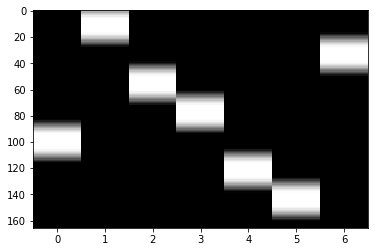

In [22]:
plt.imshow(random_image_1, aspect='auto', cmap='Greys_r')

# Figpath = 'Fig_temp/'
# savename = Figpath+"Random1_stim_image.pdf"
# plt.savefig(savename, transparent=True, bbox_inches='tight')

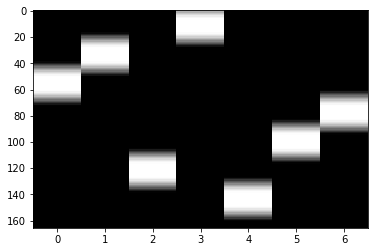

In [23]:
plt.imshow(random_image_2, aspect='auto', cmap='Greys_r')


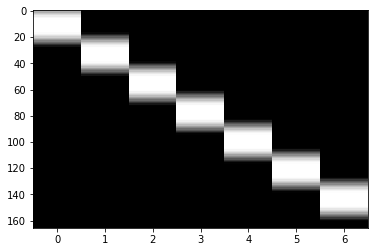

In [24]:
plt.imshow(stimulus_image, aspect='auto', cmap='Greys_r')


array([-0.00881538,  0.0169145 , -0.01408611, -0.07104049,  0.01596048,
        0.01198362, -0.0269369 , -0.04363461, -0.08733519, -0.05147879,
       -0.02678104, -0.04681065, -0.02154797])

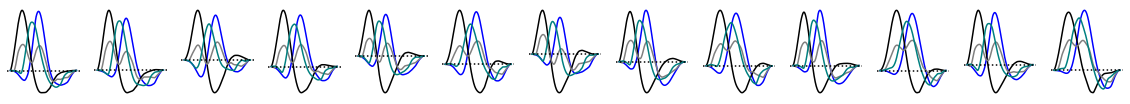

In [25]:
#get convolved responses

# cluster_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,]
dsi = np.zeros(13)
dsi_off = np.zeros(13)

fig, ax = plt.subplots(1, 13, figsize=(20, 1.6666))
for i, clust in enumerate(ipl_depth_order):
    # get the necessaries
    # spline = (NoiseSplineRF2 & key).fetch1('spl')
    spline = average_filters[:,:,clust]
    edge_buffer = 15 #(ConvolutionKernelParams() & key).fetch1('edge_buffer')
    # stimulus_image = (ConvolutionStimulus() & key).fetch1('stimulus_image')
    stimulus_image_rev = np.flip(stimulus_image, axis=1) #AV CORRECTED THIS
    kernel_type = 'left'#(ConvolutionKernelParams() & key).fetch1('kernel_type')
    # space_per_pixelx, space_per_pixely = (StimulusParams.NoiseParams() & key).fetch1('box_dx_um', 'box_dy_um')

    # set up and crop the kernel
    kernel_length = stimulus_image.shape[1]  # needs to be the same length as the stimulus

    # get the location of the RF center in the kernel
    spline_temp = spline[edge_buffer:-edge_buffer, :]
    index_max = np.unravel_index(np.argmax(np.abs(spline_temp), axis=None), spline_temp.shape)
    peak_y = index_max[1]
    peak_y = 19

    # crop the kernel depending on the type of experiment
    if kernel_type == 'right':
        spline_cut = spline[edge_buffer:-edge_buffer, int(peak_y - 1):int(peak_y + kernel_length - 1)]
    elif kernel_type == 'left':
        spline_cut = spline[edge_buffer:-edge_buffer, int(peak_y + 1 - kernel_length):int(peak_y + 1)]
    elif kernel_type == 'full':
        spline_cut = spline[edge_buffer:-edge_buffer,
                     0:kernel_length]  # should be full kernel, just adding space range just in case
    elif kernel_type == 'centered':
        spline_cut = spline[edge_buffer:-edge_buffer,
                     int(np.floor(peak_y - kernel_length / 2)):int(np.floor(peak_y + kernel_length / 2))]
    else:
        spline_cut = spline  # just to make the code happy, this should never be the option
    # can code in other possibilities here...

    # check whether cut spline is big enough
    space_length = spline_cut.shape[1]
    if kernel_length == space_length:
        empty_flag = 0
        # setup output variables
        convolved_response = np.zeros((spline_cut.shape[0] + stimulus_image.shape[0] - 1, spline_cut.shape[1]))
        convolved_response_rev = np.zeros((spline_cut.shape[0] + stimulus_image.shape[0] - 1, spline_cut.shape[1]))
        convolved_response_r1 = np.zeros((spline_cut.shape[0] + stimulus_image.shape[0] - 1, spline_cut.shape[1]))
        convolved_response_r2 = np.zeros((spline_cut.shape[0] + stimulus_image.shape[0] - 1, spline_cut.shape[1]))

        
        # loop through x positions and convolve
        for x_position in range(stimulus_image.shape[1]):
            ker = np.flip(spline_cut[:, x_position])
            img = stimulus_image[:, x_position]
            img2 = stimulus_image_rev[:, x_position]
            img3 = random_image_1[:,x_position]
            img4 = random_image_2[:,x_position]
            # and then convolve these two
            convolved_response[:, x_position] = np.convolve(a=img, v=ker, mode='full')
            convolved_response_rev[:, x_position] = np.convolve(a=img2, v=ker, mode='full')
            convolved_response_r1[:, x_position] = np.convolve(a=img3, v=ker, mode='full')
            convolved_response_r2[:, x_position] = np.convolve(a=img4, v=ker, mode='full')      
    else:
        empty_flag = 1
        convolved_response = []
        convolved_response_rev = []

    response = np.sum(convolved_response, axis=1)
    response_rev = np.sum(convolved_response_rev, axis=1)
    response_r1 = np.sum(convolved_response_r1, axis=1)
    response_r2 = np.sum(convolved_response_r2, axis=1)

    max_response = np.amax(response[:300])
    max_response_rev = np.amax(response_rev[:300])
    max_response_off = np.amin(response[:300])
    max_response_rev_off = np.amin(response_rev[:300])
    dsi[clust] = (max_response - max_response_rev) / (max_response + max_response_rev)
    dsi_off[clust] = (max_response_off - max_response_rev_off) / (max_response_off + max_response_rev_off)
#     print(dsi, dsi_off)
#     plt.figure()
    ax[i].plot(response*polarity[clust], color='b')
    ax[i].plot(response_rev*polarity[clust], color='k')
    ax[i].plot(response_r1*polarity[clust], color='grey')
    ax[i].plot(response_r2*polarity[clust], color='teal')

    ax[i].axhline(color='k', linestyle='dotted')
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].axis('off')


dsi_all = np.where(cluster_avg_depth<0.5, dsi, dsi_off)
dsi_all
# Figpath = 'Fig_temp/'
# savename = Figpath+"Convolved_responses_motion_random.pdf"
# plt.savefig(savename, transparent=True, bbox_inches='tight')

In [26]:
def convolved_motion_random_dsis(velocity, convolution_params):
    # Get response predictions for 1000 um/s for display

    # get the stimulus for convolution

#     convolution_stim_params_id = 'convolution_stim_params_id = 1'
#     field = field5_c #field3

#     convolution_params = (ConvolutionStimulusParams() & convolution_stim_params_id).fetch1()
    convolution_params['stimulus_velocity'] = velocity # WARNING altering this to play around with velocity tuning
    convolution_params['dendrite_length'] = 140
    convolution_params['distance_covered'] = 180
#     real_time_lag, time_points = (NoiseDesignMatrix2() & field).fetch1('real_time_lag', 'time_points')
#     space_per_pixelx, space_per_pixely = (StimulusParams.NoiseParams() & field).fetch1('box_dx_um', 'box_dy_um')
    if space_per_pixelx < space_per_pixely:  # check which is the shorter dimension of the stimulus
        space_per_pixel = space_per_pixelx
    else:
        space_per_pixel = space_per_pixely

    time, dend, diag, x_start, x_stop, y_start, y_stop = get_svg_parameters_on_screen(
        convolution_params['dendrite_length'],
        convolution_params['moving_bar_length'],
        convolution_params['stimulus_velocity'],
        convolution_params['starting_point'],
        convolution_params['distance_covered'],
        real_time_lag,
        time_points,
        space_per_pixel
    )

    string_svg = """<svg width="{0}" height="{1}" viewBox="0 0 {2} {3}">
        <rect x="0" y="0" width="{4}" height="{5}" fill="black" />
          <line x1="{6}" y1="{7}" x2="{8}" y2="{9}"
              stroke-width="{10}" stroke="white" stroke-linecap="square"/>
        </svg>""".format(dend, time, dend, time, dend, time, x_start, y_start, x_stop, y_stop, diag)

    folder_str = 'Data/'
    file_name = str(1)
    name_svg = folder_str + file_name + ".svg"
    name_png = folder_str + file_name + ".png"

    new_file = open(name_svg, "wt")
    new_file.write(string_svg)
    new_file.close()

    cairosvg.svg2png(url=name_svg, write_to=name_png)

    stimulus_image = np.array(Image.open(name_png).convert('L'))


    #random sequences
    random_sequence_1 = [4, 0, 2, 3, 5, 6, 1,] #[1, 6, 5, 3, 2, 0, 4]


    random_sequence_2 = [2, 1, 5, 0, 6, 4, 3] #[3, 4, 6, 0, 5, 1, 2]

    random_image_1 = stimulus_image[:,random_sequence_1]
    random_image_2 = stimulus_image[:,random_sequence_2]

    
    #get convolved responses

    # cluster_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,]
    dsi = np.zeros(13)
    dsi_off = np.zeros(13)
    random_pref = np.zeros(13)
    random_pref_off = np.zeros(13)
    
    max_response = np.zeros(13)
    max_response_rev = np.zeros(13)
    max_response_r1 = np.zeros(13)
    max_response_r2 = np.zeros(13)
    max_response_off = np.zeros(13)
    max_response_rev_off = np.zeros(13)
    max_response_r1_off = np.zeros(13)
    max_response_r2_off = np.zeros(13)

    fig, ax = plt.subplots(1, 13, figsize=(20, 1.6666))
    for i, clust in enumerate(ipl_depth_order):
        # get the necessaries
        # spline = (NoiseSplineRF2 & key).fetch1('spl')
        spline = average_filters[:,:,clust]
        edge_buffer = 15 #(ConvolutionKernelParams() & key).fetch1('edge_buffer')
        # stimulus_image = (ConvolutionStimulus() & key).fetch1('stimulus_image')
        stimulus_image_rev = np.flip(stimulus_image, axis=0)
        kernel_type = 'left'#(ConvolutionKernelParams() & key).fetch1('kernel_type')
        # space_per_pixelx, space_per_pixely = (StimulusParams.NoiseParams() & key).fetch1('box_dx_um', 'box_dy_um')

        # set up and crop the kernel
        kernel_length = stimulus_image.shape[1]  # needs to be the same length as the stimulus

        # get the location of the RF center in the kernel
        spline_temp = spline[edge_buffer:-edge_buffer, :]
        index_max = np.unravel_index(np.argmax(np.abs(spline_temp), axis=None), spline_temp.shape)
        peak_y = index_max[1]
        peak_y = 19

        # crop the kernel depending on the type of experiment
        if kernel_type == 'right':
            spline_cut = spline[edge_buffer:-edge_buffer, int(peak_y - 1):int(peak_y + kernel_length - 1)]
        elif kernel_type == 'left':
            spline_cut = spline[edge_buffer:-edge_buffer, int(peak_y + 1 - kernel_length):int(peak_y + 1)]
        elif kernel_type == 'full':
            spline_cut = spline[edge_buffer:-edge_buffer,
                         0:kernel_length]  # should be full kernel, just adding space range just in case
        elif kernel_type == 'centered':
            spline_cut = spline[edge_buffer:-edge_buffer,
                         int(np.floor(peak_y - kernel_length / 2)):int(np.floor(peak_y + kernel_length / 2))]
        else:
            spline_cut = spline  # just to make the code happy, this should never be the option
        # can code in other possibilities here...

        # check whether cut spline is big enough
        space_length = spline_cut.shape[1]
        if kernel_length == space_length:
            empty_flag = 0
            # setup output variables
            convolved_response = np.zeros((spline_cut.shape[0] + stimulus_image.shape[0] - 1, spline_cut.shape[1]))
            convolved_response_rev = np.zeros((spline_cut.shape[0] + stimulus_image.shape[0] - 1, spline_cut.shape[1]))
            convolved_response_r1 = np.zeros((spline_cut.shape[0] + stimulus_image.shape[0] - 1, spline_cut.shape[1]))
            convolved_response_r2 = np.zeros((spline_cut.shape[0] + stimulus_image.shape[0] - 1, spline_cut.shape[1]))


            # loop through x positions and convolve
            for x_position in range(stimulus_image.shape[1]):
                ker = np.flip(spline_cut[:, x_position])
                img = stimulus_image[:, x_position]
                img2 = stimulus_image_rev[:, x_position]
                img3 = random_image_1[:,x_position]
                img4 = random_image_2[:,x_position]
                # and then convolve these two
                convolved_response[:, x_position] = np.convolve(a=img, v=ker, mode='full')
                convolved_response_rev[:, x_position] = np.convolve(a=img2, v=ker, mode='full')
                convolved_response_r1[:, x_position] = np.convolve(a=img3, v=ker, mode='full')
                convolved_response_r2[:, x_position] = np.convolve(a=img4, v=ker, mode='full')      
        else:
            empty_flag = 1
            convolved_response = []
            convolved_response_rev = []

        response = np.sum(convolved_response, axis=1)
        response_rev = np.sum(convolved_response_rev, axis=1)
        response_r1 = np.sum(convolved_response_r1, axis=1)
        response_r2 = np.sum(convolved_response_r2, axis=1)

        max_response[clust] = np.amax(response[:300])
        max_response_rev[clust] = np.amax(response_rev[:300])
        max_response_off[clust] = np.amin(response[:300])
        max_response_rev_off[clust] = np.amin(response_rev[:300])
#         dsi[clust] = (max_response - max_response_rev) / (max_response + max_response_rev)
#         dsi_off[clust] = (max_response_off - max_response_rev_off) / (max_response_off + max_response_rev_off)
        
        max_response_r1[clust] = np.amax(response_r1[:300])
        max_response_r2[clust] = np.amax(response_r2[:300])
        max_response_r1_off[clust] = np.amin(response_r1[:300])
        max_response_r2_off[clust] = np.amin(response_r2[:300])
#         random_pref[clust] = (max_response_r2 - max_response_r1) / (max_response_r1 + max_response_r2)
#         random_pref_off[clust] = (max_response_r2_off - max_response_r1_off) / (max_response_r1_off + max_response_r2_off)
        
    #     print(dsi, dsi_off)
    #     plt.figure()
        ax[i].plot(response*polarity[clust], color='b')
        ax[i].plot(response_rev*polarity[clust], color='k')
        ax[i].plot(response_r1*polarity[clust], color='grey')
        ax[i].plot(response_r2*polarity[clust], color='teal')

        ax[i].axhline(color='k', linestyle='dotted')
        ax[i].set_yticklabels([])
    #     ax[i].set_xticklabels([])
    #     ax[i].axis('off')
    
    return max_response, max_response_rev, max_response_r1, max_response_r2, max_response_off, max_response_rev_off, max_response_r1_off, max_response_r2_off

#dsi, dsi_off, random_pref, random_pref_off

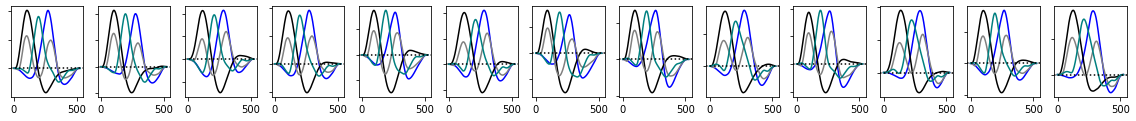

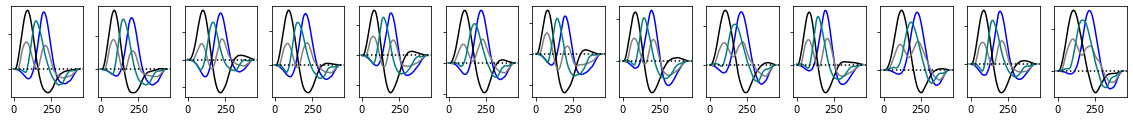

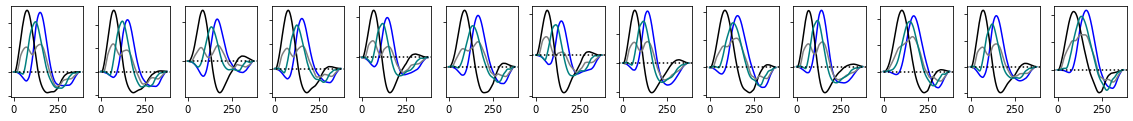

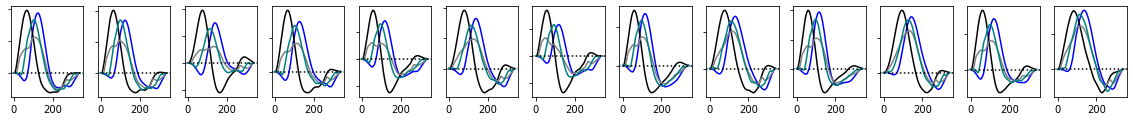

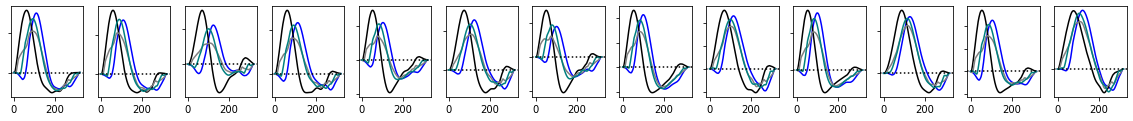

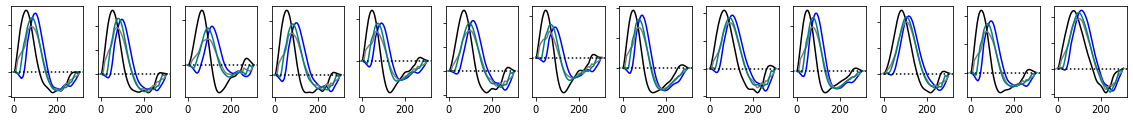

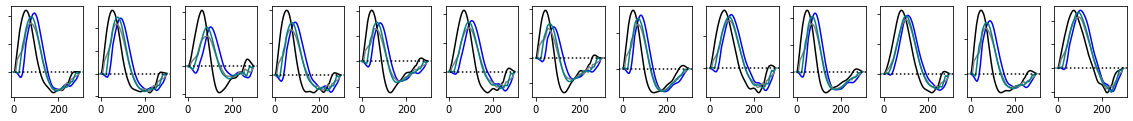

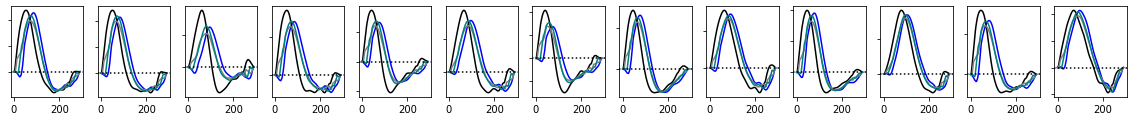

In [27]:
#run models
velocities = [350, 500, 750, 1000, 1250, 1500, 1750, 2000]  #250

outward_amp = np.zeros((len(velocities), 13))
inward_amp = np.zeros((len(velocities), 13))
random1_amp = np.zeros((len(velocities), 13))
random2_amp = np.zeros((len(velocities), 13))

for i, velocity in enumerate(velocities):
    max_response, max_response_rev, max_response_r1, max_response_r2, max_response_off, max_response_rev_off, max_response_r1_off, max_response_r2_off = convolved_motion_random_dsis(velocity, convolution_params)
    inward_amp[i,:] = np.where(cluster_avg_depth<0.5, max_response, max_response_off)
    outward_amp[i, :] = np.where(cluster_avg_depth<0.5, max_response_rev, max_response_rev_off)
    random1_amp[i, :] = np.where(cluster_avg_depth<0.5, max_response_r1, max_response_r1_off)
    random2_amp[i, :] = np.where(cluster_avg_depth<0.5, max_response_r2, max_response_r2_off)
    

In [28]:
random_avg_amp = (random1_amp+random2_amp)/2

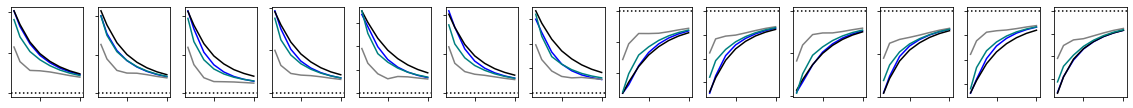

In [29]:
#DSI as a function of velocity for each stimulus case
fig, ax = plt.subplots(1, 13, figsize=(20, 1.6666))
for i, clust in enumerate(ipl_depth_order):


    ax[i].plot(velocities, inward_amp[:, clust], color='blue')
    ax[i].plot(velocities, outward_amp[:,clust], color='black')
    ax[i].plot(velocities, random1_amp[:, clust], color='grey')
    ax[i].plot(velocities, random2_amp[:, clust], color='teal')

    ax[i].axhline(color='k', linestyle='dotted')
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])

plt.show()

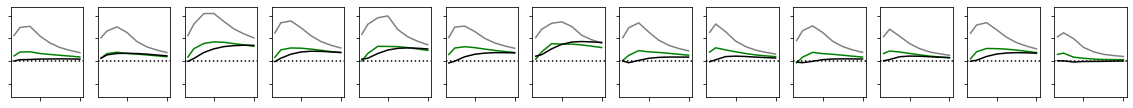

In [30]:
#DSI as a function of velocity for each stimulus case
fig, ax = plt.subplots(1, 13, figsize=(20, 1.6666))
for i, clust in enumerate(ipl_depth_order):

    ax[i].plot(velocities, (outward_amp[:, clust]-random1_amp[:,clust])/(outward_amp[:, clust]+random1_amp[:,clust]), 
               color='grey')
    ax[i].plot(velocities, (outward_amp[:, clust]-random2_amp[:,clust])/(outward_amp[:, clust]+random2_amp[:,clust]), 
               color='green')
    ax[i].plot(velocities, (outward_amp[:, clust]-inward_amp[:,clust])/(outward_amp[:, clust]+inward_amp[:,clust]), 
               color='k')

    ax[i].set_ylim([-.4, .6])
    ax[i].axhline(color='k', linestyle='dotted')
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])

plt.show()

In [31]:
# #DSI as a function of velocity for each stimulus case
# fig, ax = plt.subplots(1, 13, figsize=(20, 1.6666))
# for i, clust in enumerate(ipl_depth_order):

#     ax[i].plot(velocities, dsi_all_all[:, clust]*-1, color='k')
#     ax[i].plot(velocities, dsi_all_all_rand[:, clust]*-1, color='grey')
#     ax[i].set_ylim([-.4, .72])
#     ax[i].axhline(color='k', linestyle='dotted')
#     ax[i].set_yticklabels([])
#     ax[i].set_xticklabels([])
# #     ax[i].axis('off')
# # plt.legend()


# # Figpath = 'Fig_temp/'
# # savename = Figpath+"Velocity_tuning_clusters_both.pdf"
# # plt.savefig(savename, transparent=True, bbox_inches='tight')
# plt.show()

In [32]:
# def convolved_dsis_drug(velocity):
#     # velocity tuning

#     # get the stimulus for convolution

#     convolution_stim_params_id = 'convolution_stim_params_id = 1'
#     field = field3

#     convolution_params = (ConvolutionStimulusParams() & convolution_stim_params_id).fetch1()
#     convolution_params['stimulus_velocity'] = velocity # WARNING altering this to play around with velocity tuning
#     convolution_params['dendrite_length'] = 140
#     convolution_params['distance_covered'] = 140
#     real_time_lag, time_points = (NoiseDesignMatrix2() & field).fetch1('real_time_lag', 'time_points')
#     space_per_pixelx, space_per_pixely = (StimulusParams.NoiseParams() & field).fetch1('box_dx_um', 'box_dy_um')
#     if space_per_pixelx < space_per_pixely:  # check which is the shorter dimension of the stimulus
#         space_per_pixel = space_per_pixelx
#     else:
#         space_per_pixel = space_per_pixely

#     time, dend, diag, x_start, x_stop, y_start, y_stop = get_svg_parameters_on_screen(
#         convolution_params['dendrite_length'],
#         convolution_params['moving_bar_length'],
#         convolution_params['stimulus_velocity'],
#         convolution_params['starting_point'],
#         convolution_params['distance_covered'],
#         real_time_lag,
#         time_points,
#         space_per_pixel
#     )

#     string_svg = """<svg width="{0}" height="{1}" viewBox="0 0 {2} {3}">
#         <rect x="0" y="0" width="{4}" height="{5}" fill="black" />
#           <line x1="{6}" y1="{7}" x2="{8}" y2="{9}"
#               stroke-width="{10}" stroke="white" stroke-linecap="square"/>
#         </svg>""".format(dend, time, dend, time, dend, time, x_start, y_start, x_stop, y_stop, diag)

#     folder_str = 'Stimulus_images/'
#     file_name = str(1)
#     name_svg = folder_str + file_name + ".svg"
#     name_png = folder_str + file_name + ".png"

#     new_file = open(name_svg, "wt")
#     new_file.write(string_svg)
#     new_file.close()

#     cairosvg.svg2png(url=name_svg, write_to=name_png)

#     stimulus_image = np.array(Image.open(name_png).convert('L'))


#     #get convolved responses

# #     cluster_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,]
#     dsi = np.zeros(13)
#     dsi_off = np.zeros(13)

#     fig, ax = plt.subplots(1, 13, figsize=(20, 1.6666))
#     for i, clust in enumerate(ipl_depth_order):
#         # get the necessaries
#         # spline = (NoiseSplineRF2 & key).fetch1('spl')
#         spline = average_filters_drug[:,:,clust] #average_filters_mirror[:, :, clust] 4:24
#         edge_buffer = 15 #(ConvolutionKernelParams() & key).fetch1('edge_buffer')
#         # stimulus_image = (ConvolutionStimulus() & key).fetch1('stimulus_image')
#         stimulus_image_rev = np.flip(stimulus_image, axis=0)
#         kernel_type = 'left'#(ConvolutionKernelParams() & key).fetch1('kernel_type')
#         # space_per_pixelx, space_per_pixely = (StimulusParams.NoiseParams() & key).fetch1('box_dx_um', 'box_dy_um')

#         # set up and crop the kernel
#         kernel_length = stimulus_image.shape[1]  # needs to be the same length as the stimulus

#         # get the location of the RF center in the kernel
#         spline_temp = spline[edge_buffer:-edge_buffer, :]
#         index_max = np.unravel_index(np.argmax(np.abs(spline_temp), axis=None), spline_temp.shape)
#         peak_y = index_max[1]
# #         print(peak_y)
#         peak_y = 19

#         # crop the kernel depending on the type of experiment
#         if kernel_type == 'right':
#             spline_cut = spline[edge_buffer:-edge_buffer, int(peak_y - 1):int(peak_y + kernel_length - 1)]
#         elif kernel_type == 'left':
#             spline_cut = spline[edge_buffer:-edge_buffer, int(peak_y + 1 - kernel_length):int(peak_y + 1)]
#         elif kernel_type == 'full':
#             spline_cut = spline[edge_buffer:-edge_buffer,
#                          0:kernel_length]  # should be full kernel, just adding space range just in case
#         elif kernel_type == 'centered':
#             spline_cut = spline[edge_buffer:-edge_buffer,
#                          int(np.floor(peak_y - kernel_length / 2)):int(np.floor(peak_y + kernel_length / 2))]
#         else:
#             spline_cut = spline  # just to make the code happy, this should never be the option
#         # can code in other possibilities here...

#         # check whether cut spline is big enough
#         space_length = spline_cut.shape[1]
#         if kernel_length == space_length:
#             empty_flag = 0
#             # setup output variables
#             convolved_response = np.zeros((spline_cut.shape[0] + stimulus_image.shape[0] - 1, spline_cut.shape[1]))
#             convolved_response_rev = np.zeros((spline_cut.shape[0] + stimulus_image.shape[0] - 1, spline_cut.shape[1]))

#             # loop through x positions and convolve
#             for x_position in range(stimulus_image.shape[1]):
#                 ker = np.flip(spline_cut[:, x_position])
#                 img = stimulus_image[:, x_position]
#                 img2 = stimulus_image_rev[:, x_position]
#                 # and then convolve these two
#                 convolved_response[:, x_position] = np.convolve(a=img, v=ker, mode='full')
#                 convolved_response_rev[:, x_position] = np.convolve(a=img2, v=ker, mode='full')
#         else:
#             empty_flag = 1
#             convolved_response = []
#             convolved_response_rev = []

#         response = np.sum(convolved_response, axis=1)
#         response_rev = np.sum(convolved_response_rev, axis=1)
#         max_response = np.amax(response)
#         max_response_rev = np.amax(response_rev)
#         max_response_off = np.amin(response)
#         max_response_rev_off = np.amin(response_rev)
#         dsi[clust] = (max_response - max_response_rev) / (max_response + max_response_rev)
# #         print(max_response, max_response_rev)
#         dsi_off[clust] = (max_response_off - max_response_rev_off) / (max_response_off + max_response_rev_off)
# #         dsi_all = np.where(cluster_avg_depth<0.5, dsi, dsi_off)
#     #     print(dsi, dsi_off)
#     #     plt.figure()
#         ax[i].plot(response*polarity[clust], color='b')
#         ax[i].plot(response_rev*polarity[clust], color='k')
#         ax[i].axhline(color='k', linestyle='dotted')
#     #     ax[i].set_yticklabels([])
#     #     ax[i].set_xticklabels([])
#     #     ax[i].axis('off')

#     # Figpath = 'Fig_temp/'
#     # savename = Figpath+"Convolved_responses.pdf"
#     # plt.savefig(savename, transparent=True, bbox_inches='tight')
#     return dsi, dsi_off

In [33]:
# #run models
# velocities = [250, 350, 500, 750, 1000, 1250, 1500, 1750, 2000]

# dsi_all_all_drug = np.zeros((len(velocities), 13))

# for i, velocity in enumerate(velocities):
#     dsi, dsi_off = convolved_dsis_drug(velocity)
#     dsi_all_all_drug[i, :] = np.where(cluster_avg_depth<0.5, dsi, dsi_off)

In [34]:
# def convolved_dsis_centered_drug(velocity):
#     # velocity tuning

#     # get the stimulus for convolution

#     convolution_stim_params_id = 'convolution_stim_params_id = 1'
#     field = field3

#     convolution_params = (ConvolutionStimulusParams() & convolution_stim_params_id).fetch1()
#     convolution_params['stimulus_velocity'] = velocity # WARNING altering this to play around with velocity tuning
#     convolution_params['dendrite_length'] = 260
#     convolution_params['distance_covered'] = 260
#     real_time_lag, time_points = (NoiseDesignMatrix2() & field).fetch1('real_time_lag', 'time_points')
#     space_per_pixelx, space_per_pixely = (StimulusParams.NoiseParams() & field).fetch1('box_dx_um', 'box_dy_um')
#     if space_per_pixelx < space_per_pixely:  # check which is the shorter dimension of the stimulus
#         space_per_pixel = space_per_pixelx
#     else:
#         space_per_pixel = space_per_pixely

#     time, dend, diag, x_start, x_stop, y_start, y_stop = get_svg_parameters_on_screen(
#         convolution_params['dendrite_length'],
#         convolution_params['moving_bar_length'],
#         convolution_params['stimulus_velocity'],
#         convolution_params['starting_point'],
#         convolution_params['distance_covered'],
#         real_time_lag,
#         time_points,
#         space_per_pixel
#     )

#     string_svg = """<svg width="{0}" height="{1}" viewBox="0 0 {2} {3}">
#         <rect x="0" y="0" width="{4}" height="{5}" fill="black" />
#           <line x1="{6}" y1="{7}" x2="{8}" y2="{9}"
#               stroke-width="{10}" stroke="white" stroke-linecap="square"/>
#         </svg>""".format(dend, time, dend, time, dend, time, x_start, y_start, x_stop, y_stop, diag)

#     folder_str = 'Stimulus_images/'
#     file_name = str(1)
#     name_svg = folder_str + file_name + ".svg"
#     name_png = folder_str + file_name + ".png"

#     new_file = open(name_svg, "wt")
#     new_file.write(string_svg)
#     new_file.close()

#     cairosvg.svg2png(url=name_svg, write_to=name_png)

#     stimulus_image = np.array(Image.open(name_png).convert('L'))


#     #get convolved responses

# #     cluster_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,]
#     dsi = np.zeros(13)
#     dsi_off = np.zeros(13)

#     fig, ax = plt.subplots(1, 13, figsize=(20, 1.6666))
#     for i, clust in enumerate(ipl_depth_order):
#         # get the necessaries
#         # spline = (NoiseSplineRF2 & key).fetch1('spl')
#         spline = average_filters_drug[:,13:26,clust]
#         edge_buffer = 15 #(ConvolutionKernelParams() & key).fetch1('edge_buffer')
#         # stimulus_image = (ConvolutionStimulus() & key).fetch1('stimulus_image')
#         stimulus_image_rev = np.flip(stimulus_image, axis=0)
#         kernel_type = 'full'#(ConvolutionKernelParams() & key).fetch1('kernel_type')
#         # space_per_pixelx, space_per_pixely = (StimulusParams.NoiseParams() & key).fetch1('box_dx_um', 'box_dy_um')

#         # set up and crop the kernel
#         kernel_length = stimulus_image.shape[1]  # needs to be the same length as the stimulus

#         # get the location of the RF center in the kernel
#         spline_temp = spline[edge_buffer:-edge_buffer, :]
#         index_max = np.unravel_index(np.argmax(np.abs(spline_temp), axis=None), spline_temp.shape)
#         peak_y = index_max[1]
#         peak_y = 19

#         # crop the kernel depending on the type of experiment
#         if kernel_type == 'right':
#             spline_cut = spline[edge_buffer:-edge_buffer, int(peak_y - 1):int(peak_y + kernel_length - 1)]
#         elif kernel_type == 'left':
#             spline_cut = spline[edge_buffer:-edge_buffer, int(peak_y + 1 - kernel_length):int(peak_y + 1)]
#         elif kernel_type == 'full':
#             spline_cut = spline[edge_buffer:-edge_buffer,
#                          0:kernel_length]  # should be full kernel, just adding space range just in case
#         elif kernel_type == 'centered':
# #             spline_cut = spline[edge_buffer:-edge_buffer,
# #                          4:11]
#             spline_cut = spline[edge_buffer:-edge_buffer,
#                          int(peak_y - (kernel_length-1) / 2):int(peak_y + (kernel_length-1) / 2 +1)]
# #             print(kernel_length)
#         else:
#             spline_cut = spline  # just to make the code happy, this should never be the option
#         # can code in other possibilities here...

#         # check whether cut spline is big enough
#         space_length = spline_cut.shape[1]
#         if kernel_length == space_length:
#             empty_flag = 0
#             # setup output variables
#             convolved_response = np.zeros((spline_cut.shape[0] + stimulus_image.shape[0] - 1, spline_cut.shape[1]))
#             convolved_response_rev = np.zeros((spline_cut.shape[0] + stimulus_image.shape[0] - 1, spline_cut.shape[1]))

#             # loop through x positions and convolve
#             for x_position in range(stimulus_image.shape[1]):
#                 ker = np.flip(spline_cut[:, x_position])
#                 img = stimulus_image[:, x_position]
#                 img2 = stimulus_image_rev[:, x_position]
#                 # and then convolve these two
#                 convolved_response[:, x_position] = np.convolve(a=img, v=ker, mode='full')
#                 convolved_response_rev[:, x_position] = np.convolve(a=img2, v=ker, mode='full')
#         else:
#             empty_flag = 1
#             convolved_response = []
#             convolved_response_rev = []

#         response = np.sum(convolved_response, axis=1)
#         response_rev = np.sum(convolved_response_rev, axis=1)
#         max_response = np.amax(response)
#         max_response_rev = np.amax(response_rev)
#         max_response_off = np.amin(response)
#         max_response_rev_off = np.amin(response_rev)
#         dsi[clust] = (max_response - max_response_rev) / (max_response + max_response_rev)
# #         print(max_response, max_response_rev)
#         dsi_off[clust] = (max_response_off - max_response_rev_off) / (max_response_off + max_response_rev_off)
# #         dsi_all = np.where(cluster_avg_depth<0.5, dsi, dsi_off)
#     #     print(dsi, dsi_off)
#     #     plt.figure()
#         ax[i].plot(response*polarity[clust], color='b')
#         ax[i].plot(response_rev*polarity[clust], color='k')
#         ax[i].axhline(color='k', linestyle='dotted')
#         ax[i].set_yticklabels([])
#         ax[i].set_xticklabels([])
#         ax[i].axis('off')
#         if velocity == 1000:
#             Figpath = 'Fig_temp/'
#             savename = Figpath+"Convolved_responses_1000.pdf"
#             plt.savefig(savename, transparent=True, bbox_inches='tight')
#     return dsi, dsi_off

In [35]:
# # run models
# velocities = [250, 350, 500, 750, 1000, 1250, 1500, 1750, 2000]

# dsi_all_all_centered_drug = np.zeros((len(velocities), 13))

# for i, velocity in enumerate(velocities):
#     dsi, dsi_off = convolved_dsis_centered_drug(velocity)
#     dsi_all_all_centered_drug[i, :] = np.where(cluster_avg_depth<0.5, dsi, dsi_off)

In [36]:
# #DSI as a function of velocity for each stimulus case
# fig, ax = plt.subplots(1, 13, figsize=(20, 1.6666))
# for i, clust in enumerate(ipl_depth_order):

#     ax[i].plot(velocities, dsi_all_all_drug[:, clust]*-1, color='k')
#     ax[i].plot(velocities, dsi_all_all_centered_drug[:, clust]*-1, color='grey')
#     ax[i].set_ylim([-.4, .72])
#     ax[i].axhline(color='k', linestyle='dotted')
#     ax[i].set_yticklabels([])
#     ax[i].set_xticklabels([])
# #     ax[i].axis('off')
# # plt.legend()


# # Figpath = 'Fig_temp/'
# # savename = Figpath+"Velocity_tuning_clusters_both.pdf"
# # plt.savefig(savename, transparent=True, bbox_inches='tight')
# plt.show()

In [37]:
# #DSI as a function of velocity for each stimulus case
# fig, ax = plt.subplots(1, 13, figsize=(20, 1.6666))
# for i, clust in enumerate(ipl_depth_order):

#     ax[i].plot(velocities, dsi_all_all[:, clust]*-1, color='k')
#     ax[i].plot(velocities, dsi_all_all_drug[:, clust]*-1, color='r')
#     ax[i].set_ylim([-.4, .4])
#     ax[i].axhline(color='k', linestyle='dotted')
#     ax[i].set_yticklabels([])
#     ax[i].set_xticklabels([])
# #     ax[i].axis('off')
# # plt.legend()


# # Figpath = 'Fig_temp/'
# # savename = Figpath+"Velocity_tuning_clusters_both.pdf"
# # plt.savefig(savename, transparent=True, bbox_inches='tight')
# plt.show()

In [38]:
# #DSI as a function of velocity for each stimulus case
# fig, ax = plt.subplots(1, 13, figsize=(20, 1.6666))
# for i, clust in enumerate(ipl_depth_order):

#     ax[i].plot(velocities, dsi_all_all_centered[:, clust]*-1, color='k')
#     ax[i].plot(velocities, dsi_all_all_centered_drug[:, clust]*-1, color='r')
#     ax[i].set_ylim([-.4, .4])
#     ax[i].axhline(color='k', linestyle='dotted')
#     ax[i].set_yticklabels([])
#     ax[i].set_xticklabels([])
# #     ax[i].axis('off')
# # plt.legend()


# # Figpath = 'Fig_temp/'
# # savename = Figpath+"Velocity_tuning_clusters_both.pdf"
# # plt.savefig(savename, transparent=True, bbox_inches='tight')
# plt.show()

# Models of motion vs. random as a function of random similarity

In [39]:
def convolved_motion_random_sequence(rand_sequence):

    random_image = stimulus_image[:,rand_sequence] #this comes in from the function
    max_response_r1 = np.zeros(13)
    max_response_r1_off = np.zeros(13)

    #some values for the convolutions
    edge_buffer = 15 #(ConvolutionKernelParams() & key).fetch1('edge_buffer')
    kernel_type = 'left'#(ConvolutionKernelParams() & key).fetch1('kernel_type')
    kernel_length = stimulus_image.shape[1]  # needs to be the same length as the stimulus
    peak_y = 19
    
    
    rmse_term = np.sqrt(((np.array([0,1,2,3,4,5,6]) - rand_sequence)**2).mean(axis=None))
    rmse_orig = np.sqrt(((np.array([6,5,4,3,2,1,0]) - rand_sequence)**2).mean(axis=None))
    
    for i, clust in enumerate(ipl_depth_order):
        # get the necessaries
        spline = average_filters[:,:,clust]
        spline_cut = spline[edge_buffer:-edge_buffer, int(peak_y + 1 - kernel_length):int(peak_y + 1)] #only left cut

        # check whether cut spline is big enough
        space_length = spline_cut.shape[1]
        if kernel_length == space_length:
            empty_flag = 0
            # setup output variables
            convolved_response_r1 = np.zeros((spline_cut.shape[0] + stimulus_image.shape[0] - 1, spline_cut.shape[1]))

            # loop through x positions and convolve
            for x_position in range(stimulus_image.shape[1]):
                ker = np.flip(spline_cut[:, x_position])
                img3 = random_image[:,x_position]
                # and then convolve these two
                convolved_response_r1[:, x_position] = np.convolve(a=img3, v=ker, mode='full')     
        else:
            empty_flag = 1
            convolved_response_r1 = []

        response_r1 = np.sum(convolved_response_r1, axis=1)        
        max_response_r1[clust] = np.amax(response_r1[:300])
        max_response_r1_off[clust] = np.amin(response_r1[:300])
    
    return max_response_r1, max_response_r1_off, rmse_term, rmse_orig

In [40]:
#set up list of random sequences for the stimulus images

inward_motion_seq = [0,1,2,3,4,5,6]
outward_motion_seq = [6,5,4,3,2,1,0]
random_sequence_1 = [4, 0, 2, 3, 5, 6, 1,] #[1, 6, 5, 3, 2, 0, 4] reversed because we are stimulating the other side
random_sequence_2 = [2, 1, 5, 0, 6, 4, 3]
in_order = [0,1,2,3,4,5,6,]

In [41]:
stim_sequences_arr = np.load('Data/stimulus_sequences_motion_random.npy')
stim_sequences = list(stim_sequences_arr)

In [42]:
# run the simulations

#make the stimulus image

convolution_params['stimulus_velocity'] = 600 # WARNING altering this to play around with velocity tuning
convolution_params['dendrite_length'] = 140
convolution_params['distance_covered'] = 180
if space_per_pixelx < space_per_pixely:  # check which is the shorter dimension of the stimulus
    space_per_pixel = space_per_pixelx
else:
    space_per_pixel = space_per_pixely

time, dend, diag, x_start, x_stop, y_start, y_stop = get_svg_parameters_on_screen(
    convolution_params['dendrite_length'],
    convolution_params['moving_bar_length'],
    convolution_params['stimulus_velocity'],
    convolution_params['starting_point'],
    convolution_params['distance_covered'],
    real_time_lag,
    time_points,
    space_per_pixel
)

string_svg = """<svg width="{0}" height="{1}" viewBox="0 0 {2} {3}">
    <rect x="0" y="0" width="{4}" height="{5}" fill="black" />
      <line x1="{6}" y1="{7}" x2="{8}" y2="{9}"
          stroke-width="{10}" stroke="white" stroke-linecap="square"/>
    </svg>""".format(dend, time, dend, time, dend, time, x_start, y_start, x_stop, y_stop, diag)

folder_str = 'Data/'
file_name = str(1)
name_svg = folder_str + file_name + ".svg"
name_png = folder_str + file_name + ".png"

new_file = open(name_svg, "wt")
new_file.write(string_svg)
new_file.close()

cairosvg.svg2png(url=name_svg, write_to=name_png)

stimulus_image = np.array(Image.open(name_png).convert('L'))


# set up the outputs of the convolutions
random_amplitudes = np.zeros((len(stim_sequences), 13))
rmses_term = np.zeros(len(stim_sequences))
rmses_orig = np.zeros(len(stim_sequences))

for i, sequence in enumerate(stim_sequences):
#     print(sequence)
    max_response_r1, max_response_r1_off, mse_term, mse_orig = convolved_motion_random_sequence(sequence)
    
    random_amplitudes[i, :] = np.where(cluster_avg_depth<0.5, max_response_r1, max_response_r1_off)
    rmses_term[i] = mse_term
    rmses_orig[i] = mse_orig
    
dsis = (random_amplitudes[1,:] - random_amplitudes)/(random_amplitudes + random_amplitudes[1,:])    

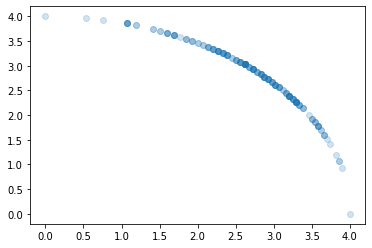

In [43]:
plt.scatter(rmses_term, rmses_orig, alpha=0.2)

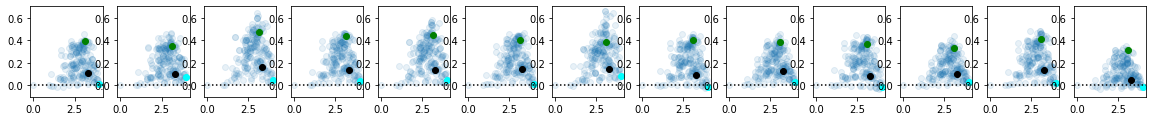

In [44]:
fig, ax = plt.subplots(1, 13, figsize=(20, 1.6666))
for i, clust in enumerate(ipl_depth_order):
    ax[i].scatter(rmses_orig, dsis[:,clust], alpha = 0.1)
    ax[i].scatter(rmses_orig[2], dsis[2,clust], c = 'g')#, alpha = 0.1)
    ax[i].scatter(rmses_orig[3], dsis[3,clust], c = 'k')#, alpha = 0.1)
    ax[i].scatter(rmses_orig[0], dsis[0,clust], c = 'cyan')
    ax[i].set_ylim([-.1, .7])
#     ax[i].set_xlim([7, 30])
    ax[i].axhline(color='k', linestyle='dotted')
#     ax[i].set_yticklabels([])
#     ax[i].set_xticklabels([])

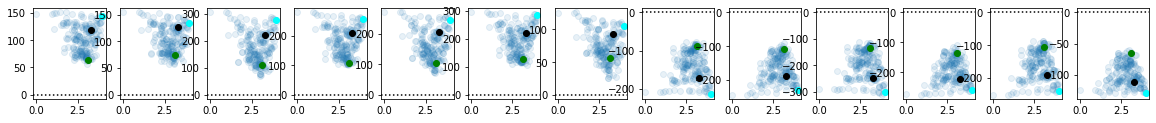

In [45]:
fig, ax = plt.subplots(1, 13, figsize=(20, 1.6666))
for i, clust in enumerate(ipl_depth_order):
    ax[i].scatter(rmses_orig, random_amplitudes[:,clust], alpha = 0.1)
    ax[i].scatter(rmses_orig[2], random_amplitudes[2,clust], c = 'g')#, alpha = 0.1)
    ax[i].scatter(rmses_orig[3], random_amplitudes[3,clust], c = 'k')#, alpha = 0.1)
    ax[i].scatter(rmses_orig[0], random_amplitudes[0,clust], c = 'cyan')

    ax[i].axhline(color='k', linestyle='dotted')


In [46]:
strong_center = np.zeros(stim_sequences_arr.shape[0])
for i in range(stim_sequences_arr.shape[0]):
    l = stim_sequences_arr[i,5:]
    
    if l[1]==l[0]-1: #sorted(l) == list(range(min(l), max(l)+1)):
        strong_center[i] = 2
    elif l[1]==l[0]+1:
        strong_center[i] = 1

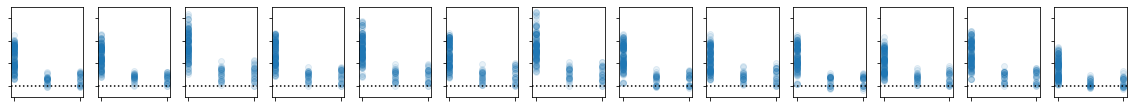

In [47]:
fig, ax = plt.subplots(1, 13, figsize=(20, 1.6666))
for i, clust in enumerate(ipl_depth_order):
    ax[i].scatter(strong_center, dsis[:,clust], alpha = 0.1)

    ax[i].set_ylim([-.1, .7])

    ax[i].axhline(color='k', linestyle='dotted')
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])

In [48]:
coherence = np.zeros(stim_sequences_arr.shape[0])

score = np.zeros(stim_sequences_arr.shape[0])#new:
for j in range(stim_sequences_arr.shape[0]):
    
    positions = np.zeros(7)
    for i in range(7):
        positions[i] = np.where(stim_sequences_arr[j,:] == i)[0][0]
    if j<4:
            print(positions)
    
    score[j] = np.sum(np.absolute(np.diff(positions)))#new

smin = np.amin(score)
smax = np.amax(score)
    
coherence = (score-smax)/(smin - smax) #coherence index from 0 to 1

[0. 1. 2. 3. 4. 5. 6.]
[6. 5. 4. 3. 2. 1. 0.]
[1. 6. 2. 3. 0. 4. 5.]
[3. 1. 0. 6. 5. 2. 4.]


In [49]:
coherence2 = np.zeros(stim_sequences_arr.shape[0])

for j in range(stim_sequences_arr.shape[0]):
    
    positions = np.zeros(7)
    for i in range(7):
        positions[i] = np.where(stim_sequences_arr[j,:] == i)[0][0]
    
    coherence2[j] = (np.sum(np.absolute(np.diff(positions)))-23)/-17#-18#+1 #coherence index from 0 to 1

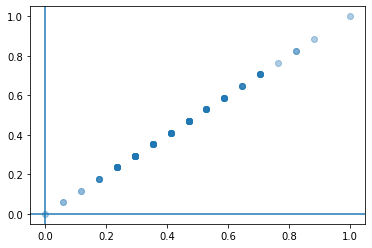

In [50]:
plt.scatter(coherence2, coherence, alpha=0.2)

axes=plt.gca()
axes.axhline()
axes.axvline()

[6 4 5 0 3 2 1] 56 0.7058823529411765
[6 5 4 3 2 1 0] 1 1.0
[6 5 4 3 2 1 0] 1 1.0
[6 5 4 3 2 1 0] 1 1.0
[6 4 3 5 2 0 1] 53 0.7058823529411765
[4 6 5 3 2 1 0] 10 0.8235294117647058
[6 4 3 5 2 0 1] 53 0.7058823529411765
[2 1 0 3 4 6 5] 94 0.8235294117647058
[6 4 5 0 3 2 1] 56 0.7058823529411765
[2 1 0 3 4 6 5] 94 0.8235294117647058
[4 6 5 3 2 1 0] 10 0.8235294117647058
[6 5 4 3 2 1 0] 1 1.0
[6 4 5 0 3 2 1] 56 0.7058823529411765


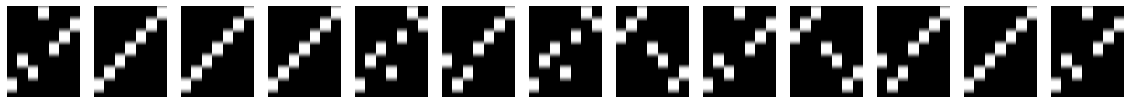

In [51]:
fig, ax = plt.subplots(1, 13, figsize=(20, 1.6666))
for i, clust in enumerate(ipl_depth_order):
    best_seq = np.argmin(dsis[:,clust])
    best_image = stimulus_image[:,stim_sequences[best_seq]]
    print(stim_sequences[best_seq], best_seq, coherence[best_seq])
#     fig = plt.figure()
    ax[i].imshow(best_image, cmap='Greys_r', aspect='auto')
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].axis('off')


plt.show()

[1 4 5 2 3 0 6] 76 0.35294117647058826
[1 4 5 2 3 0 6] 76 0.35294117647058826
[1 5 4 2 0 6 3] 116 0.23529411764705882
[4 1 3 5 0 2 6] 135 0.29411764705882354
[5 1 2 4 0 3 6] 17 0.29411764705882354
[0 2 3 5 4 6 1] 165 0.35294117647058826
[4 2 5 0 1 3 6] 26 0.23529411764705882
[4 6 1 2 3 0 5] 146 0.17647058823529413
[1 5 3 2 4 0 6] 182 0.23529411764705882
[4 6 1 2 3 0 5] 146 0.17647058823529413
[1 5 3 2 4 0 6] 182 0.23529411764705882
[4 2 5 0 1 3 6] 26 0.23529411764705882
[3 1 2 5 4 6 0] 33 0.47058823529411764


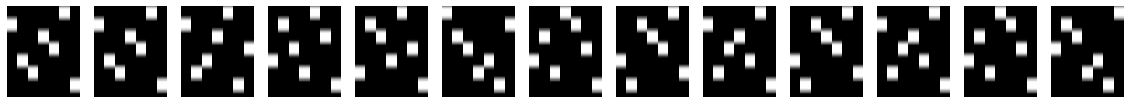

In [52]:
fig, ax = plt.subplots(1, 13, figsize=(20, 1.6666))
for i, clust in enumerate(ipl_depth_order):
    best_seq = np.argmax(dsis[:,clust])
    best_image = stimulus_image[:,stim_sequences[best_seq]]
    print(stim_sequences[best_seq], best_seq, coherence[best_seq])
#     fig = plt.figure()
    ax[i].imshow(best_image, cmap='Greys_r', aspect='auto')
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].axis('off')


plt.show()

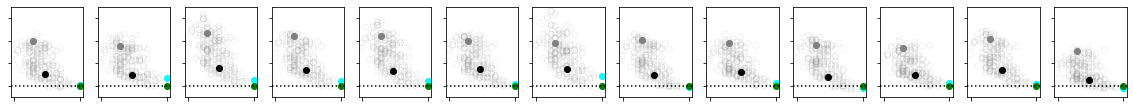

In [53]:
fig, ax = plt.subplots(1, 13, figsize=(20, 1.6666))
for i, clust in enumerate(ipl_depth_order):
    ax[i].scatter(coherence, dsis[:,clust], alpha = 0.1, facecolors='none', edgecolors='grey')
    ax[i].scatter(coherence[2], dsis[2,clust], c = 'grey')#, alpha = 0.1)
    ax[i].scatter(coherence[3], dsis[3,clust],  c = 'k')#, alpha = 0.1)
    ax[i].scatter(coherence[0], dsis[0,clust], c = 'cyan')
    ax[i].scatter(coherence[1], dsis[1,clust], c = 'g') 
    ax[i].set_ylim([-.1, .7])
#     ax[i].set_xlim([7, 30])
    ax[i].axhline(color='k', linestyle='dotted')
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    


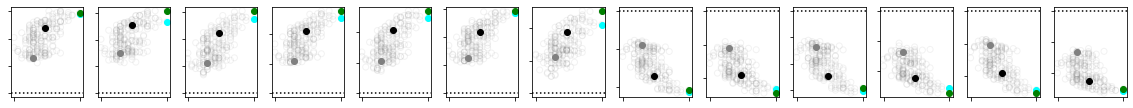

In [54]:
fig, ax = plt.subplots(1, 13, figsize=(20, 1.6666))
for i, clust in enumerate(ipl_depth_order):
    ax[i].scatter(coherence, random_amplitudes[:,clust], alpha = 0.1, facecolors='none', edgecolors='grey')
    ax[i].scatter(coherence[2], random_amplitudes[2,clust], c = 'grey')#, alpha = 0.1) #random sequence 1
    ax[i].scatter(coherence[3], random_amplitudes[3,clust], c = 'k')#, alpha = 0.1) #random sequence 2
    ax[i].scatter(coherence[0], random_amplitudes[0,clust], c = 'cyan') #inward motion
    ax[i].scatter(coherence[1], random_amplitudes[1,clust], c = 'g') 
#     ax[i].set_ylim([0, 320])
#     ax[i].set_xlim([7, 30])
    ax[i].axhline(color='k', linestyle='dotted')
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])



In [55]:
hop_size = np.zeros(stim_sequences_arr.shape[0])
center_last = np.zeros(stim_sequences_arr.shape[0])
for i in range(stim_sequences_arr.shape[0]):
    l = stim_sequences_arr[i,4:] #the three closest-to-center stimulus positions
    
    a = abs(l[0] - l[1])
    c = abs(l[1] - l[2])
    hop_size[i] = a+c
    
    if l[2]==6:
        center_last[i] = 1

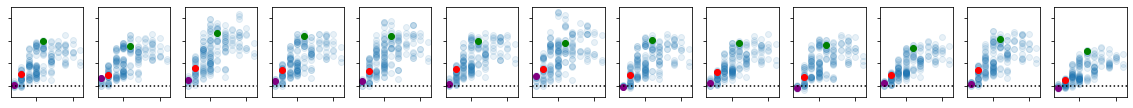

In [56]:
fig, ax = plt.subplots(1, 13, figsize=(20, 1.6666))
for i, clust in enumerate(ipl_depth_order):
    ax[i].scatter(hop_size, dsis[:,clust], alpha = 0.1)
    ax[i].scatter(hop_size[2], dsis[2,clust], c = 'g')#, alpha = 0.1)
    ax[i].scatter(hop_size[3], dsis[3,clust], c = 'r')#, alpha = 0.1)
    ax[i].scatter(hop_size[0], dsis[0,clust], c = 'purple')
    ax[i].set_ylim([-.1, .7])
#     ax[i].set_xlim([7, 30])
    ax[i].axhline(color='k', linestyle='dotted')
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])

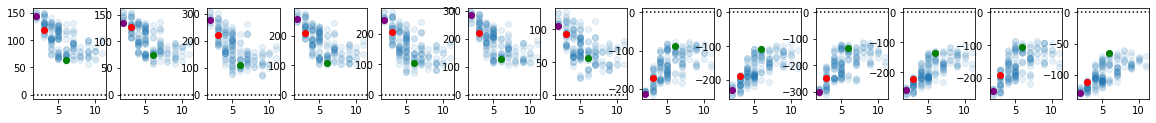

In [57]:
fig, ax = plt.subplots(1, 13, figsize=(20, 1.6666))
for i, clust in enumerate(ipl_depth_order):
    ax[i].scatter(hop_size, random_amplitudes[:,clust], alpha = 0.1)
    ax[i].scatter(hop_size[2], random_amplitudes[2,clust], c = 'g')#, alpha = 0.1)
    ax[i].scatter(hop_size[3], random_amplitudes[3,clust], c = 'r')#, alpha = 0.1)
    ax[i].scatter(hop_size[0], random_amplitudes[0,clust], c = 'purple')

    ax[i].axhline(color='k', linestyle='dotted')


# Motion Random responses by cluster

In [58]:
#pull these from hdf5
dsi_results_2 = pd.read_hdf('Data/Fig4.hdf5', 'dsi_results_2')
dsi_results_33 = pd.read_hdf('Data/Fig4.hdf5', 'dsi_results_33')
dsi_results_22 = pd.read_hdf('Data/Fig4.hdf5', 'dsi_results_22')
dsi_results_5 = pd.read_hdf('Data/Fig4.hdf5', 'dsi_results_5')
dsi_results_6 = pd.read_hdf('Data/Fig4.hdf5', 'dsi_results_6')
dsi_results_7 = pd.read_hdf('Data/Fig4.hdf5', 'dsi_results_7')



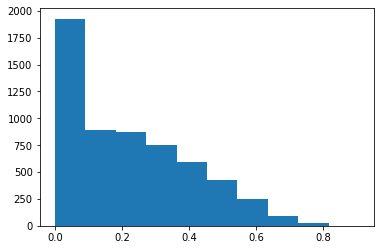

In [59]:
dsi_results_all = pd.concat([dsi_results_33,  dsi_results_5, dsi_results_6, dsi_results_7, dsi_results_22]) #dsi_results_2, 

plt.hist(dsi_results_all['mu_std_max'])

plt.show()

#remove non-responsive pixels, where the model failed to detect a large change in response
threshold = 0.1
dsi_results_all = dsi_results_all[dsi_results_all['mu_std_max']>threshold]
# dsi_results_all.pop('mu_std_max')



In [60]:
def dprime(mu1, mu2, sig1, sig2):
    d_prime = (mu1 - mu2) / np.sqrt(0.5 * (sig1 ** 2 + sig2 ** 2))

In [61]:
dsi_results_all['dsi_motion_out_v_random1'] = (dsi_results_all['out_motion']-dsi_results_all['1_random'])/np.sqrt(0.5*(dsi_results_all['out_motion_sig']**2+dsi_results_all['1_random_sig']**2))

dsi_results_all['dsi_motion_out_v_random2'] = (dsi_results_all['out_motion']-dsi_results_all['2_random'])/np.sqrt(0.5*(dsi_results_all['out_motion_sig']**2+dsi_results_all['2_random_sig']**2))

dsi_results_all['dsi_motion_out_v_motion_in_fixed'] = (dsi_results_all['out_motion']-dsi_results_all['in_motion'])/np.sqrt(0.5*(dsi_results_all['out_motion_sig']**2+dsi_results_all['in_motion_sig']**2))


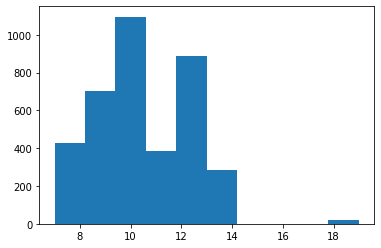

In [62]:
plt.hist(dsi_results_all['cluster_center'])

plt.show()

In [63]:
field_nums = dsi_results_all['field'].unique()

for num in field_nums:
    print(num, dsi_results_all[dsi_results_all['field']==num].shape)

33.0 (1151, 35)
55.0 (456, 35)
66.0 (822, 35)
77.0 (748, 35)
222.0 (626, 35)


In [64]:
for_boxplot = pd.melt(dsi_results_all[dsi_results_all['cluster_center'].isin([9,10])].reset_index(), 
                      id_vars=['index', 'cluster_assignment', 'field'], 
                      value_vars=['out_motion_norm','in_motion_norm','2_random_norm', '1_random_norm']) #'in_motion_norm', '1_random_norm', '2_random_norm'

In [65]:
ipl_depth_order_on = [0,  3,  9,  7, 11,  2,  8]

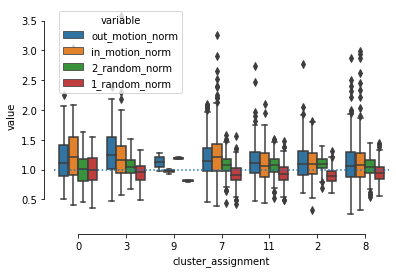

In [66]:
sns.boxplot(x="cluster_assignment", y="value", hue="variable", order=ipl_depth_order_on, # ipl_depth_order_on
            data=for_boxplot)
sns.despine(offset=10, trim=True)

axes = plt.gca()

axes.axhline(y=1, linestyle='dotted')


plt.show()

In [67]:
# stats: 2-way repeated measures Anova
import pingouin as pg

for_stats = for_boxplot[for_boxplot['cluster_assignment'].isin(ipl_depth_order_on)]
for_stats["id"] = for_stats['index']+for_stats["field"]*10000

pg.rm_anova(dv='value',
                  within=['cluster_assignment', 'variable'],
                  subject='id', data=for_stats, correction=True)





C:\Users\alv5645\AppData\Local\Temp/ipykernel_16496/566800737.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_stats["id"] = for_stats['index']+for_stats["field"]*10000
C:\Users\alv5645\Anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedPackageWarning: The package outdated is out of date. Your version is 0.2.1, the latest is 0.2.2.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(
C:\Users\alv5645\Anaconda3\lib\site-packages\pingouin\parametric.py:747: RuntimeWarning: invalid value encountered in scalar divide
  f_a = ms_a / ms_as
C:\Users\alv5645\Anaconda3\lib\site-packages\pingouin\parametric.py:748: RuntimeWarning: invalid value encountered in scalar divide
  f_b = ms_b / ms_bs
C:\Users\alv5

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,cluster_assignment,0.0,-1,1,-0.0,NaN,NaN,NaN,NaN,1.0
1,variable,0.0,-1,1,-0.0,NaN,NaN,NaN,NaN,1.0
2,cluster_assignment * variable,0.0,1,-1,0.0,NaN,NaN,NaN,NaN,NaN


In [68]:

pg.pairwise_ttests(dv='value', within='variable', subject='id',
                              between='cluster_assignment', padjust='bonf', data=for_stats, within_first=False).round(4).tail(50)

C:\Users\alv5645\Anaconda3\lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
C:\Users\alv5645\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:7321: RuntimeWarning: divide by zero encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
C:\Users\alv5645\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:7313: RuntimeWarning: divide by zero encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


,Contrast,cluster_assignment,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
19,cluster_assignment,-,8,11,False,True,0.5750,498.8431,two-sided,0.5656,1.0000,bonf,0.111,0.0489
20,cluster_assignment,-,9,11,False,True,-0.5355,1.0352,two-sided,0.6846,1.0000,bonf,0.566,-0.2448
21,variable,-,1_random_norm,2_random_norm,True,True,-12.8172,1090.0000,two-sided,0.0000,0.0000,bonf,4.758e+31,-0.7758
22,variable,-,1_random_norm,in_motion_norm,True,True,-17.6237,1090.0000,two-sided,0.0000,0.0000,bonf,5.433e+57,-0.7677
23,variable,-,1_random_norm,out_motion_norm,True,True,-19.9559,1090.0000,two-sided,0.0000,0.0000,bonf,1.181e+72,-0.8428
24,variable,-,2_random_norm,in_motion_norm,True,True,-7.4648,1090.0000,two-sided,0.0000,0.0000,bonf,2.007e+10,-0.3137
25,variable,-,2_random_norm,out_motion_norm,True,True,-8.2854,1090.0000,two-sided,0.0000,0.0000,bonf,8.935e+12,-0.3593
26,variable,-,in_motion_norm,out_motion_norm,True,True,-0.5602,1090.0000,two-sided,0.5754,1.0000,bonf,0.04,-0.0190
27,cluster_assignment * variable,0,1_random_norm,2_random_norm,True,True,-0.3576,35.0000,two-sided,0.7228,1.0000,bonf,0.19,-0.1179
28,cluster_assignment * variable,0,1_random_norm,in_motion_norm,True,True,-3.1063,35.0000,two-sided,0.0037,0.1573,bonf,9.861,-0.6591


In [69]:
next_boxplot = pd.melt(dsi_results_all[dsi_results_all['cluster_center'].isin([9, 10,])].reset_index(), 
                      id_vars=['index', 'cluster_assignment', 'field'], 
                      value_vars=['dsi_motion_out_v_motion_in_fixed','dsi_motion_out_v_random2','dsi_motion_out_v_random1']) #'in_motion_norm', '1_random_norm', '2_random_norm'

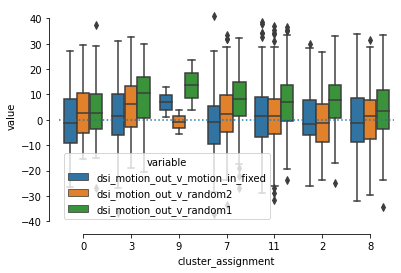

In [70]:
sns.boxplot(x="cluster_assignment", y="value", hue="variable", order=ipl_depth_order_on, # ipl_depth_order_on
            data=next_boxplot)
sns.despine(offset=10, trim=True)

axes = plt.gca()

axes.axhline(y=0, linestyle='dotted')


plt.show()

C:\Users\alv5645\AppData\Local\Temp/ipykernel_16496/3068292168.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.catplot(x="cluster_assignment", y="value", hue="variable",


(-25.0, 25.0)

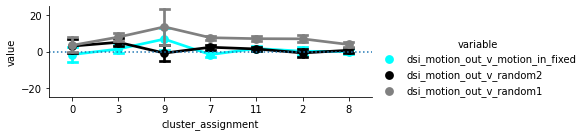

In [71]:
# fig = plt.figure(figsize=(.11, .04))
sns.catplot(x="cluster_assignment", y="value", hue="variable",
                capsize=.2, palette=['cyan', 'black', 'grey'], height=2, aspect=11/4,
                kind="point", ci=95,order=ipl_depth_order_on, data=next_boxplot,)

axes = plt.gca()

axes.axhline(linestyle='dotted')
axes.set_ylim([-25,25])


C:\Users\alv5645\AppData\Local\Temp/ipykernel_16496/268445509.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.catplot(x="cluster_assignment", y="value", hue="variable",order=ipl_depth_order_on, data=next_boxplot,


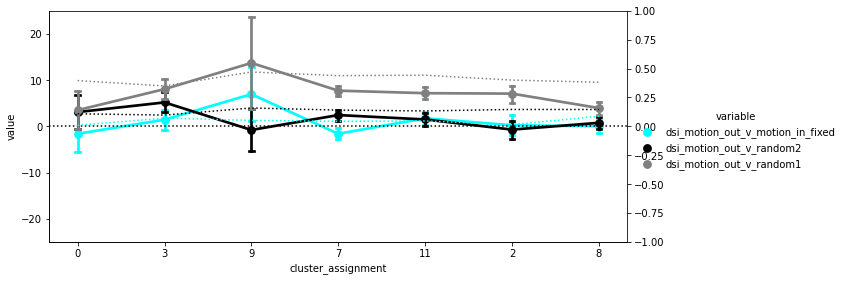

In [74]:
# fig = plt.figure(figsize=(10,5))
sns.catplot(x="cluster_assignment", y="value", hue="variable",order=ipl_depth_order_on, data=next_boxplot,
                capsize=.05, palette=['cyan', 'black', 'grey'],height=4, aspect=9/4, #markersize=2,linewidth=1,
                kind="point", ci=95,
               
               )

axes = plt.gca()

axes.axhline(linestyle='dotted', color='k')
axes.set_ylim([-25,25])

ax2=axes.twinx()
# make a plot with different y-axis using second axis object

#add model predictions for this velocity to the plot
ax2.plot(dsis[0,ipl_depth_order_on], c='cyan', linestyle='dotted')
ax2.plot(dsis[2,ipl_depth_order_on], c='grey', linestyle='dotted')
ax2.plot(dsis[3,ipl_depth_order_on], c='black', linestyle='dotted')

ax2.set_ylim([-1,1])



plt.show()

In [75]:
# stats: 2-way repeated measures Anova
# import pingouin as pg

next_for_stats = next_boxplot[next_boxplot['cluster_assignment'].isin(ipl_depth_order_on)]
next_for_stats["id"] = next_for_stats['index']+next_for_stats["field"]*10000

pg.rm_anova(dv='value',
                  within=['cluster_assignment', 'variable'],
                  subject='id', data=next_for_stats, correction=True)





C:\Users\alv5645\AppData\Local\Temp/ipykernel_16496/675835428.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  next_for_stats["id"] = next_for_stats['index']+next_for_stats["field"]*10000
C:\Users\alv5645\Anaconda3\lib\site-packages\pingouin\parametric.py:747: RuntimeWarning: invalid value encountered in scalar divide
  f_a = ms_a / ms_as
C:\Users\alv5645\Anaconda3\lib\site-packages\pingouin\parametric.py:748: RuntimeWarning: invalid value encountered in scalar divide
  f_b = ms_b / ms_bs
C:\Users\alv5645\Anaconda3\lib\site-packages\pingouin\parametric.py:749: RuntimeWarning: invalid value encountered in scalar divide
  f_ab = ms_ab / ms_abs
C:\Users\alv5645\Anaconda3\lib\site-packages\pingouin\parametric.py:764: RuntimeWarning: invalid value 

,Source,SS,ddof1,ddof2,MS,F,p-unc,p-GG-corr,ng2,eps
0,cluster_assignment,0.0,-1,1,-0.0,NaN,NaN,NaN,NaN,1.0
1,variable,0.0,-1,1,-0.0,NaN,NaN,NaN,NaN,1.0
2,cluster_assignment * variable,0.0,1,-1,0.0,NaN,NaN,NaN,NaN,NaN


In [76]:

pg.pairwise_ttests(dv='value', within='variable', subject='id',
                              between='cluster_assignment', padjust='bonf', data=next_for_stats, within_first=False).round(4).tail(50)

C:\Users\alv5645\Anaconda3\lib\site-packages\pingouin\pairwise.py:28: UserWarning: pairwise_ttests is deprecated, use pairwise_tests instead.
  warnings.warn("pairwise_ttests is deprecated, use pairwise_tests instead.", UserWarning)
C:\Users\alv5645\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:7321: RuntimeWarning: divide by zero encountered in _nct_sf
  return np.clip(_boost._nct_sf(x, df, nc), 0, 1)
C:\Users\alv5645\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:7313: RuntimeWarning: divide by zero encountered in _nct_cdf
  return np.clip(_boost._nct_cdf(x, df, nc), 0, 1)


,Contrast,cluster_assignment,A,B,Paired,Parametric,T,dof,alternative,p-unc,p-corr,p-adjust,BF10,hedges
0,cluster_assignment,-,0,2,False,True,-0.2883,57.9888,two-sided,0.7741,1.0000,bonf,0.213,-0.0574
1,cluster_assignment,-,0,3,False,True,-1.7177,59.0305,two-sided,0.0911,1.0000,bonf,0.757,-0.3290
2,cluster_assignment,-,0,7,False,True,-0.6950,41.4729,two-sided,0.4909,1.0000,bonf,0.235,-0.1400
3,cluster_assignment,-,0,8,False,True,0.0467,44.4998,two-sided,0.9629,1.0000,bonf,0.189,0.0083
4,cluster_assignment,-,0,9,False,True,-0.7097,1.1189,two-sided,0.5966,1.0000,bonf,0.607,-0.4956
5,cluster_assignment,-,0,11,False,True,-1.0398,44.2850,two-sided,0.3041,1.0000,bonf,0.309,-0.1857
6,cluster_assignment,-,2,3,False,True,-2.0741,210.8738,two-sided,0.0393,0.8250,bonf,1.114,-0.2827
7,cluster_assignment,-,2,7,False,True,-0.6276,163.0143,two-sided,0.5311,1.0000,bonf,0.153,-0.0758
8,cluster_assignment,-,2,8,False,True,0.5740,190.7567,two-sided,0.5667,1.0000,bonf,0.149,0.0646
9,cluster_assignment,-,2,9,False,True,-0.6449,1.0360,two-sided,0.6323,1.0000,bonf,0.587,-0.4788


# # Looking at example/average responses by cluster

In [77]:
cluster_num = 11 #9, 11
cluster_frame = dsi_results_all[dsi_results_all['cluster_assignment']==cluster_num]

(0.9, 2.0)

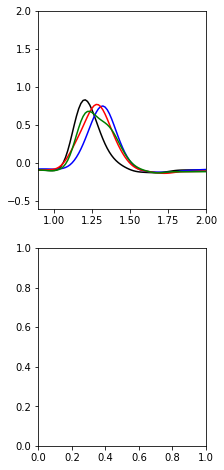

In [78]:
#plot responses for all rois in a cluster
fig, ax = plt.subplots(2, 1, figsize=(3, 8))

n_conds = cluster_frame['mu'].iloc[0].shape[0]
x_predict_t = cluster_frame['x_predict'].iloc[0][::n_conds,:]

average_out = np.zeros(x_predict_t[:,0].shape[0])
average_in = np.zeros(x_predict_t[:,0].shape[0])
average_random1 = np.zeros(x_predict_t[:,0].shape[0])
average_random2 = np.zeros(x_predict_t[:,0].shape[0])

for i in range(cluster_frame['mu'].shape[0]):
    out_motion = cluster_frame['mu'].iloc[i][2,:]
    average_out += out_motion
    in_motion = cluster_frame['mu'].iloc[i][0,:]
    average_in += in_motion
    
    random1_mu = cluster_frame['mu'].iloc[i][1,:]
    average_random1 += random1_mu
    random2_mu = cluster_frame['mu'].iloc[i][3,:]
    average_random2 += random2_mu
    



average_out/=(i+1)
average_in/=(i+1)
average_random1/=(i+1)
average_random2/=(i+1)

ax[0].plot(x_predict_t[:,0], average_out, c='k')
ax[0].plot(x_predict_t[:,0], average_in, c='b')
ax[0].set_ylim([-0.6,2.0])
ax[0].set_xlim([0.9,2.])


ax[0].plot(x_predict_t[:,0], average_random1, c='r')
ax[0].plot(x_predict_t[:,0], average_random2, c='g')
ax[0].set_ylim([-0.6,2.0])
ax[0].set_xlim([0.9,2.])

In [79]:
int(np.round((cluster_frame.index.shape)[0]/2))

302

380
706
712
1574
683
1108
797


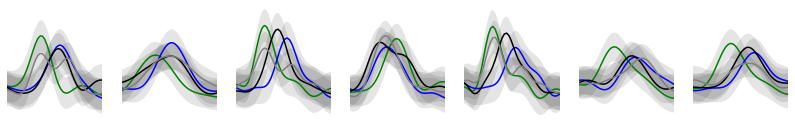

In [80]:
# find a random example cluster response for each cluster
fig, ax = plt.subplots(1, 7, figsize=(14, 2))

for i, cluster_num in enumerate(ipl_depth_order_on):
    cluster_frame = dsi_results_all[dsi_results_all['cluster_assignment']==cluster_num]
    cluster_frame = cluster_frame[cluster_frame['mu_std_max']>0.5]
    
    roi_num = cluster_frame.index[int(np.round((cluster_frame.index.shape)[0]/2))]
    print(roi_num)
    
    out_motion = cluster_frame['mu'].loc[roi_num][2,:]
    in_motion = cluster_frame['mu'].loc[roi_num][0,:]
    random1_mu = cluster_frame['mu'].loc[roi_num][1,:]
    random2_mu = cluster_frame['mu'].loc[roi_num][3,:]

    out_motion_sig = cluster_frame['sig'].loc[roi_num][2,:]
    in_motion_sig = cluster_frame['sig'].loc[roi_num][0,:]
    random1_mu_sig = cluster_frame['sig'].loc[roi_num][1,:]
    random2_mu_sig = cluster_frame['sig'].loc[roi_num][3,:]

#     fig, ax = plt.subplots(2, 1, figsize=(1.5, 4))

    upper, lower = compute_bounds(out_motion, out_motion_sig, n_sigma = 3)
    ax[i].fill_between(x_predict_t[:,0], upper, lower, facecolor = 'k', alpha = 0.1)
    ax[i].plot(x_predict_t[:,0], out_motion, c='g')#

    upper, lower = compute_bounds(in_motion, in_motion_sig, n_sigma = 3)
    ax[i].fill_between(x_predict_t[:,0], upper, lower, facecolor = 'k', alpha = 0.1)
    ax[i].plot(x_predict_t[:,0], in_motion, c='b')#, alpha=0.2)

    upper, lower = compute_bounds(random1_mu, random1_mu_sig, n_sigma = 3)
    ax[i].fill_between(x_predict_t[:,0], upper, lower, facecolor = 'k', alpha = 0.1)
    ax[i].plot(x_predict_t[:,0], random1_mu, c='k')#, alpha=0.2)

    upper, lower = compute_bounds(random2_mu, random2_mu_sig, n_sigma = 3)
    ax[i].fill_between(x_predict_t[:,0], upper, lower, facecolor = 'k', alpha = 0.1)
    ax[i].plot(x_predict_t[:,0], random2_mu, c='grey')#, alpha=0.2)

    ax[i].set_ylim([-1,2.5])
    ax[i].set_xlim([1.0,1.6])
    ax[i].set_yticklabels([])
    ax[i].set_xticklabels([])
    ax[i].axis('off')
    


